In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# 109. Dealing with Outliers

In [2]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=43):
    
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)
    
    return sample_ages

In [5]:
sample = create_ages()

In [7]:
sample

array([53., 38., 45., 43., 61., 45., 56., 76., 66., 44., 45., 56., 28.,
       39., 56., 48., 75., 42., 36., 38., 50., 48., 79., 45., 51., 61.,
       49., 57., 55., 61., 32., 61., 48., 52., 45., 72., 23., 68., 41.,
       70., 66., 63., 61., 79., 42., 42., 41., 62., 33., 63., 46., 36.,
       36., 40., 31., 57., 61., 62., 42., 54., 50., 59., 56., 51., 26.,
       48., 51., 41., 47., 33., 46., 57., 77., 37., 50., 38., 49., 47.,
       61., 63., 52., 49., 65., 52., 70., 29., 73., 42., 36., 49., 35.,
       57., 44., 54., 37., 47., 51., 48., 71., 58.])

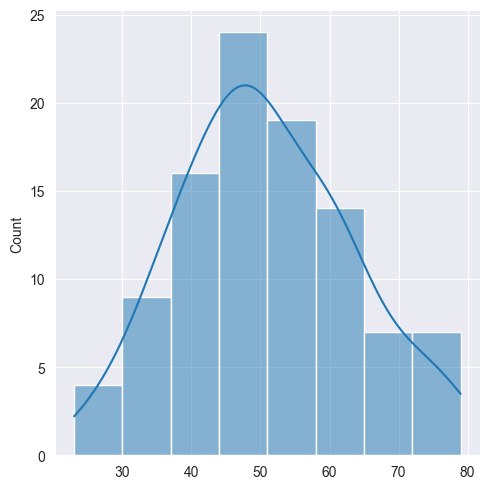

In [8]:
sns.displot(sample, kde=True)

<Axes: >

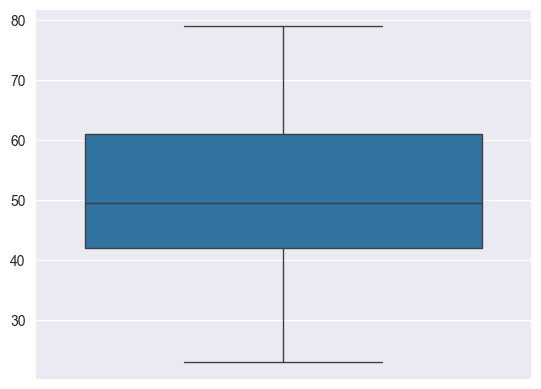

In [9]:
sns.boxplot(sample)

In [10]:
ser = pd.Series(sample)

In [11]:
ser.describe()

count    100.000000
mean      50.810000
std       12.534957
min       23.000000
25%       42.000000
50%       49.500000
75%       61.000000
max       79.000000
dtype: float64

In [13]:
IQR = 55.25 - 42.0

In [14]:
lower_limit = 1.5 * IQR

In [25]:
q75, q25 = np.percentile(ser, [75 ,25])

In [26]:
ipq = q75 - q25

In [29]:
data_path = Path.cwd() / '..' / '..' / 'DATA' / 'Ames_Housing_Data.csv'

In [30]:
df = pd.read_csv(data_path)

In [31]:
df_int = df.select_dtypes(include=['int'])

In [32]:
df_int.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
2nd Flr SF         0.269373
Lot Area           0.266549
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
Misc Val          -0.015691
Yr Sold           -0.030569
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0.119814
Enclosed Porch    -0.128787
PID               -0.246521
Name: SalePrice, dtype: float64

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

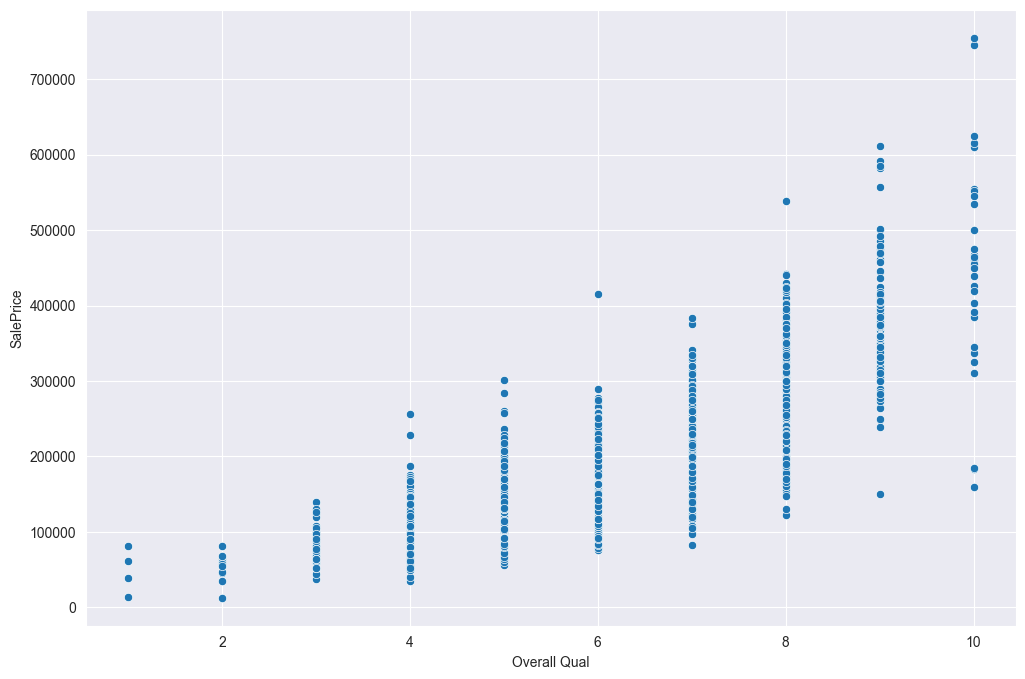

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

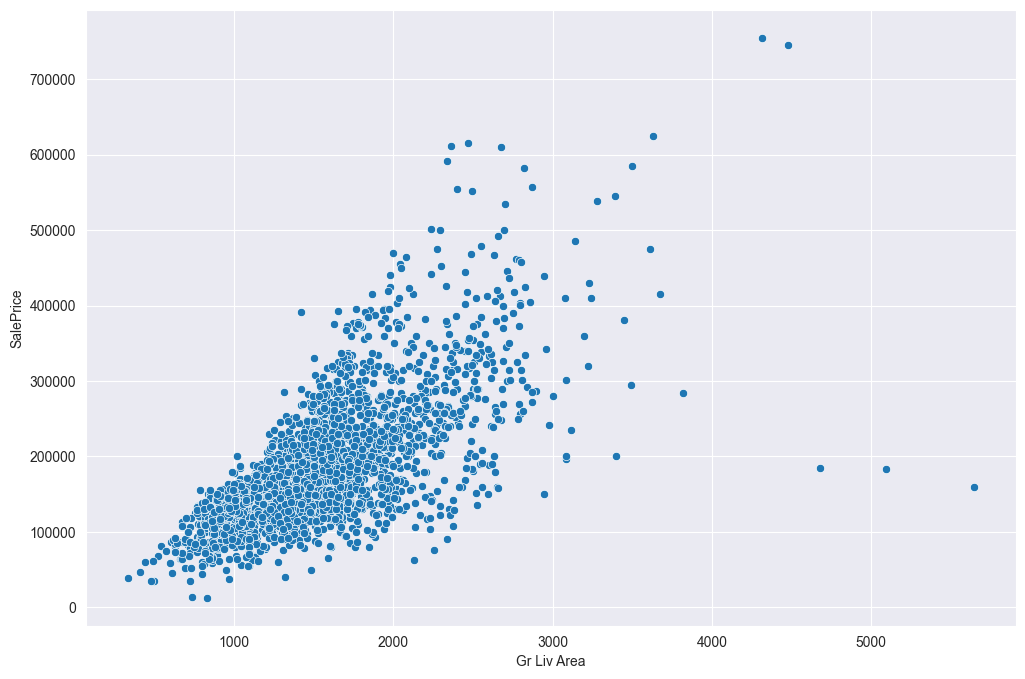

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

In [37]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [38]:
drop_index = df[(df['Gr Liv Area'] > 4_000) & (df['SalePrice'] < 400_000)].index
df[(df['Gr Liv Area'] > 4_000) & (df['SalePrice'] < 400_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

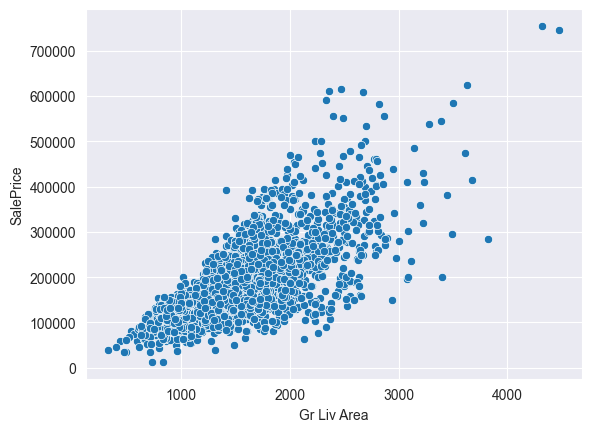

In [42]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [43]:
df_path = Path.cwd() / '..' / '..' / 'DATA' / 'Ames_outliers_removed.csv'

df = pd.read_csv(df_path)